<a href="https://colab.research.google.com/github/Tio256604/Capstone-Project_Tio-Syahputra/blob/main/CAPSTONE_PROJECT_TIO_SYAHPUTRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 4.4 MB/s eta 0:00:00


In [ ]:
import os
from google.colab import userdata

api_token = userdata.get("api_token")
os.environ["REPLICATE_API_TOKEN"] = api_token

In [ ]:
from langchain_community.llms import Replicate

llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct"
)

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list -s coffee

ref                                                 title                                          size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------  ---------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
ihelon/coffee-sales                                 Coffee Sales                                  43929  2025-03-25 10:20:05.300000          40448        417  1.0              
michals22/coffee-dataset                            Coffee dataset                                24496  2022-12-15 20:02:12.277000          18672        237  1.0              
ahmedabbas757/coffee-sales                          Coffee Shop Sales                           8627333  2023-12-01 19:04:06.920000          17856        132  0.88235295       
schmoyote/coffee-reviews-dataset                    Coffee Reviews Dataset                       582745  2023-01-19

In [ ]:
!kaggle datasets download -d ihelon/coffee-sales

Dataset URL: https://www.kaggle.com/datasets/ihelon/coffee-sales
License(s): CC0-1.0
  0% 0.00/42.9k [00:00<?, ?B/s]
100% 42.9k/42.9k [00:00<00:00, 94.3MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile("coffee-sales.zip", 'r') as zip_ref:
    zip_ref.extractall("coffee_data")

In [ ]:
import os
os.listdir("coffee_data")

['index_2.csv', 'index_1.csv']

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Coffe_sales.xlsx to Coffe_sales.xlsx


In [ ]:
import pandas as pd

xls = pd.ExcelFile("Coffe_sales.xlsx")
print(xls.sheet_names)

['index_1']


In [ ]:
df = pd.read_excel(xls, sheet_name='index_1')

In [ ]:
df['coffee_name'] = df['coffee_name'].str.strip()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3636 non-null   datetime64[ns]
 1   datetime     3636 non-null   datetime64[ns]
 2   hour_of_day  3636 non-null   int64         
 3   cash_type    3636 non-null   object        
 4   card         3547 non-null   object        
 5   money        3636 non-null   float64       
 6   coffee_name  3636 non-null   object        
 7   Time_of_Day  3636 non-null   object        
 8   Weekday      3636 non-null   object        
 9   Month_name   3636 non-null   object        
 10  Weekdaysort  3636 non-null   int64         
 11  Monthsort    3636 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 341.0+ KB


In [ ]:
klasifikasi_otomatis = pd.DataFrame({
    "Nama Kolom": df.columns,
    "Jenis Data (Pandas)": df.dtypes.astype(str),
    "Contoh Nilai": df.iloc[0]
})

klasifikasi_otomatis

,Nama Kolom,Jenis Data (Pandas),Contoh Nilai
date,date,datetime64[ns],2024-03-01 00:00:00
datetime,datetime,datetime64[ns],2024-03-01 10:15:50.520000
hour_of_day,hour_of_day,int64,10
cash_type,cash_type,object,card
card,card,object,ANON-0000-0000-0001
money,money,float64,38.7
coffee_name,coffee_name,object,Latte
Time_of_Day,Time_of_Day,object,Morning
Weekday,Weekday,object,Fri
Month_name,Month_name,object,Mar


In [ ]:
df = xls.parse("index_1")
df.head()

,date,datetime,hour_of_day,cash_type,card,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort
0,2024-03-01,2024-03-01 10:15:50.520,10,card,ANON-0000-0000-0001,38.7,Latte,Morning,Fri,Mar,5,3
1,2024-03-01,2024-03-01 12:19:22.539,12,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3
2,2024-03-01,2024-03-01 12:20:18.089,12,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3
3,2024-03-01,2024-03-01 13:46:33.006,13,card,ANON-0000-0000-0003,28.9,Americano,Afternoon,Fri,Mar,5,3
4,2024-03-01,2024-03-01 13:48:14.626,13,card,ANON-0000-0000-0004,38.7,Latte,Afternoon,Fri,Mar,5,3


In [ ]:
sales_count = df['coffee_name'].value_counts().reset_index()
sales_count.columns = ['coffee_name', 'sales_count']

In [ ]:
sales_revenue = df.groupby('coffee_name')['money'].sum().reset_index()
sales_revenue.columns = ['coffee_name', 'total_revenue']

In [ ]:
coffee_summary = pd.merge(sales_count, sales_revenue, on='coffee_name')
coffee_summary = coffee_summary.sort_values(by='sales_count', ascending=False).reset_index(drop=True)

In [ ]:
coffee_summary

,coffee_name,sales_count,total_revenue
0,Americano with Milk,824,25269.12
1,Latte,782,27866.30
2,Americano,578,15062.26
3,Cappuccino,501,18034.14
4,Cortado,292,7534.86
5,Hot Chocolate,282,10172.46
6,Cocoa,243,8678.16
7,Espresso,134,2814.28


In [ ]:
data = {
    'coffee_name': [
        'Americano with Milk', 'Latte', 'Americano', 'Cappuccino',
        'Cortado', 'Hot Chocolate', 'Cocoa', 'Espresso'
    ],
    'sales_count': [824, 782, 578, 501, 292, 282, 243, 134],
    'total_revenue': [25269.12, 27866.30, 15062.26, 18034.14, 7534.86, 10172.46, 8678.16, 2814.28]
}

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
coffee_colors = ['#4B2E2B', '#7B3F00', '#A9746E', '#D2B48C', '#C19A6B', '#8B5E3C', '#5C4033', '#3B2F2F']

In [ ]:
df_kopi = pd.DataFrame(data)

/tmp/ipython-input-3922187215.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


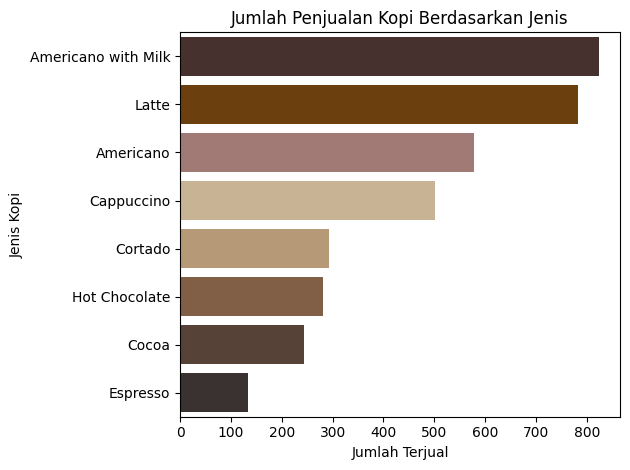

In [ ]:
sns.barplot(
    x='sales_count',
    y='coffee_name',
    data=df_kopi,
    palette=coffee_colors
)

plt.title('Jumlah Penjualan Kopi Berdasarkan Jenis')
plt.xlabel('Jumlah Terjual')
plt.ylabel('Jenis Kopi')
plt.tight_layout()
plt.show()

In [ ]:
df_kopi = df_kopi.sort_values('total_revenue', ascending=False)

/tmp/ipython-input-2248576698.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


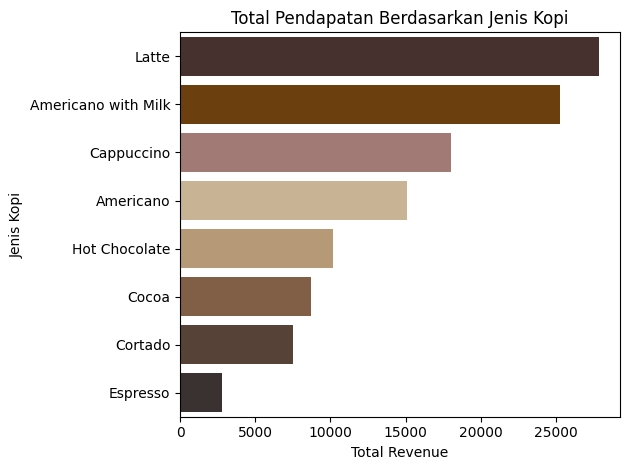

In [ ]:
sns.barplot(
    x='total_revenue',
    y='coffee_name',
    data=df_kopi,
    palette=coffee_colors
)

plt.title('Total Pendapatan Berdasarkan Jenis Kopi')
plt.xlabel('Total Revenue')
plt.ylabel('Jenis Kopi')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1709177876.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1709177876.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


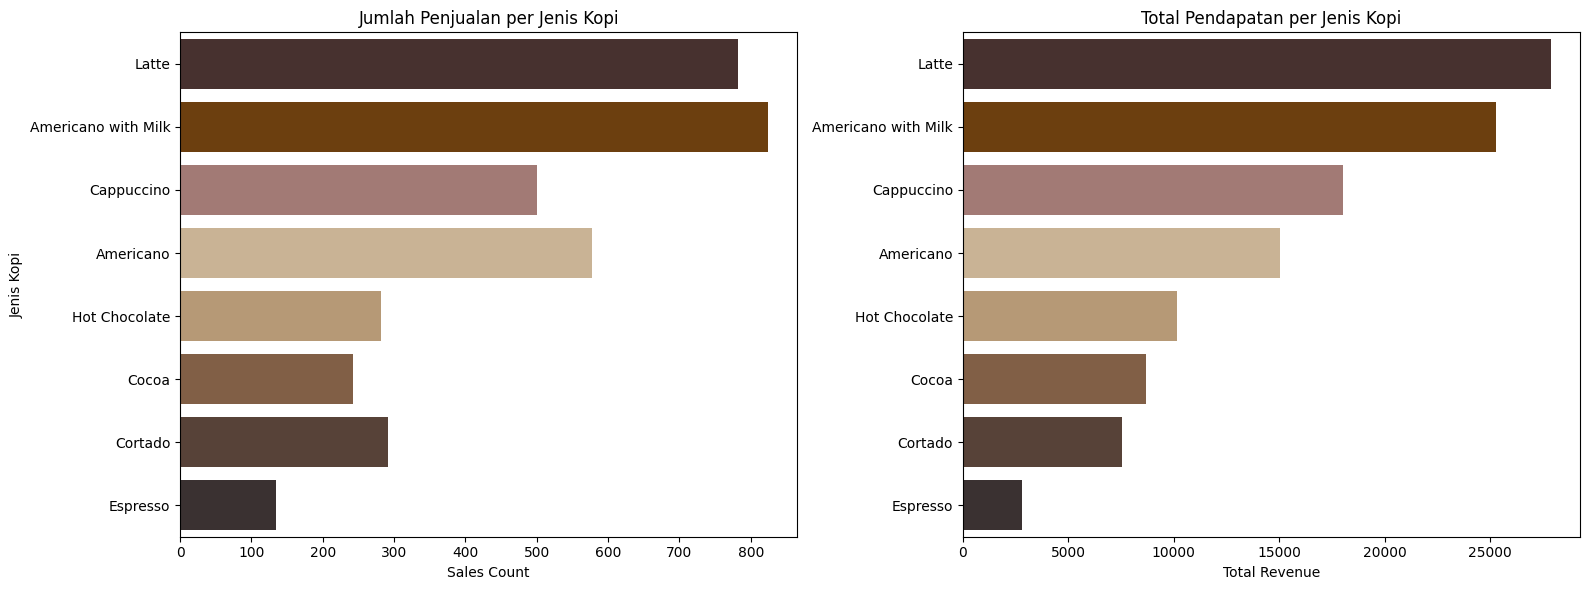

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(
    x='sales_count',
    y='coffee_name',
    data=df_kopi,
    palette=coffee_colors,
    ax=axes[0]
)
axes[0].set_title('Jumlah Penjualan per Jenis Kopi')
axes[0].set_xlabel('Sales Count')
axes[0].set_ylabel('Jenis Kopi')

sns.barplot(
    x='total_revenue',
    y='coffee_name',
    data=df_kopi,
    palette=coffee_colors,
    ax=axes[1]
)
axes[1].set_title('Total Pendapatan per Jenis Kopi')
axes[1].set_xlabel('Total Revenue')
axes[1].set_ylabel('')
plt.tight_layout()
plt.savefig("penjualan_kopi.png", dpi=300)
plt.show()

In [ ]:
from google.colab import files
files.download("penjualan_kopi.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
transaksi_per_hari = df['Weekday'].value_counts()

In [ ]:
transaksi_per_hari_df = transaksi_per_hari.reset_index()
transaksi_per_hari_df.columns = ['Weekday', 'Total Transaksi']

In [ ]:
transaksi_per_hari_df = transaksi_per_hari_df.sort_values(by='Total Transaksi', ascending=False)

In [ ]:
transaksi_per_hari_df

,Weekday,Total Transaksi
0,Tue,585
1,Mon,561
2,Fri,544
3,Thu,520
4,Wed,510
5,Sat,482
6,Sun,434


In [ ]:
data = {
    'Weekday': ['Tue', 'Mon', 'Fri', 'Thu', 'Wed', 'Sat', 'Sun'],
    'Total Transaksi': [585, 561, 544, 520, 510, 482, 434]
}

In [ ]:
df_hari = pd.DataFrame(data)

In [ ]:
urutan_hari = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_hari['Weekday'] = pd.Categorical(df_hari['Weekday'], categories=urutan_hari, ordered=True)
df_hari = df_hari.sort_values('Weekday')

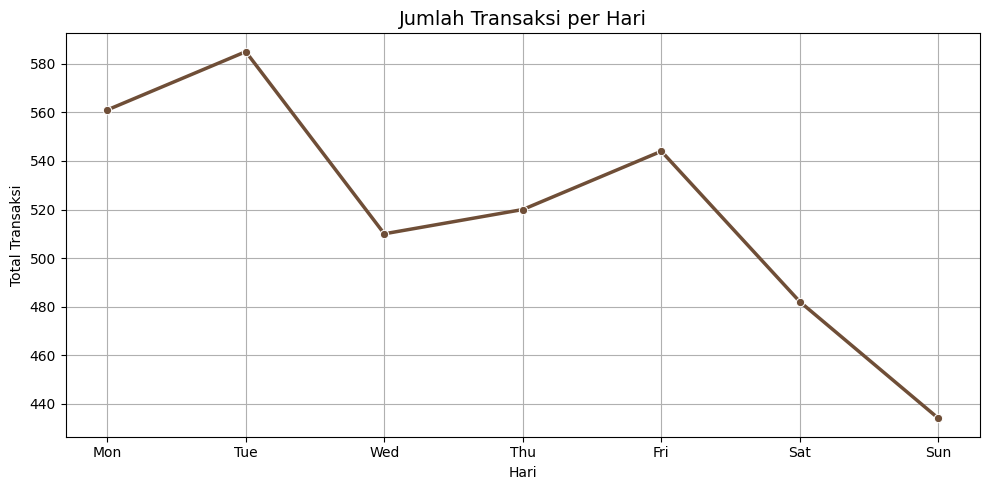

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Weekday', y='Total Transaksi', data=df_hari, marker='o', color='#6F4E37', linewidth=2.5)
plt.title('Jumlah Transaksi per Hari', fontsize=14)
plt.xlabel('Hari')
plt.ylabel('Total Transaksi')
plt.grid(True)
plt.tight_layout()
plt.savefig("transaksi_harian.png", dpi=300)
plt.show()

In [ ]:
from google.colab import files
files.download("transaksi_harian.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
transaksi_per_waktu = df['Time_of_Day'].value_counts().reset_index()
transaksi_per_waktu.columns = ['Time_of_Day', 'Total Transaksi']

In [ ]:
transaksi_per_waktu = transaksi_per_waktu.sort_values(by='Total Transaksi', ascending=False)

In [ ]:
transaksi_per_waktu

,Time_of_Day,Total Transaksi
0,Afternoon,1231
1,Morning,1221
2,Night,1184


In [ ]:
data = {
    'Time_of_Day': ['Afternoon', 'Morning', 'Night'],
    'Total Transaksi': [1231, 1221, 1184]
}

In [ ]:
df_time = pd.DataFrame(data)

/tmp/ipython-input-2900969780.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Time_of_Day', y='Total Transaksi', data=df_time, palette=coffee_colors)
/tmp/ipython-input-2900969780.py:2: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x='Time_of_Day', y='Total Transaksi', data=df_time, palette=coffee_colors)


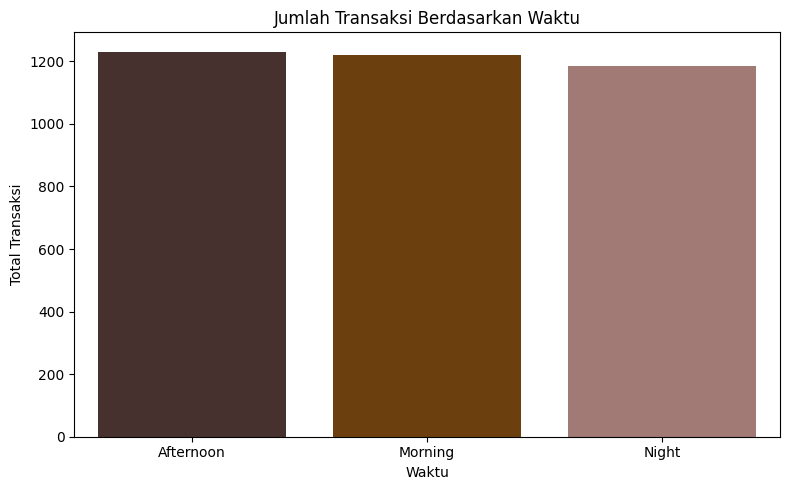

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Time_of_Day', y='Total Transaksi', data=df_time, palette=coffee_colors)
plt.title('Jumlah Transaksi Berdasarkan Waktu')
plt.xlabel('Waktu')
plt.ylabel('Total Transaksi')
plt.tight_layout()
plt.savefig("transaksi_waktu.png", dpi=300)
plt.show()

In [ ]:
from google.colab import files
files.download("transaksi_waktu.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
frekuensi_cash_type = df['cash_type'].value_counts().reset_index()
frekuensi_cash_type.columns = ['Jenis Pembayaran', 'Total Transaksi']

In [ ]:
frekuensi_cash_type

,Jenis Pembayaran,Total Transaksi
0,card,3547
1,cash,89


In [ ]:
labels = ['Card', 'Cash']
transaksi = [3547, 89]
colors = ['#8B5E3C', '#D2B48C']

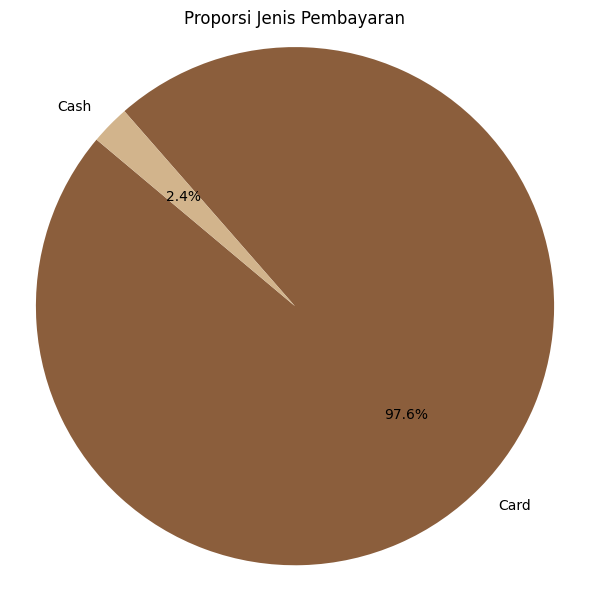

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(transaksi, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Proporsi Jenis Pembayaran')
plt.axis('equal')
plt.tight_layout()
plt.savefig("proporsi_pembayaran.png", dpi=300)
plt.show()

In [ ]:
from google.colab import files
files.download("proporsi_pembayaran.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
monthly_sales = df.groupby('Month_name')['money'].sum().reset_index()

In [ ]:
monthly_sales = df.groupby(['Monthsort', 'Month_name'])['money'].sum().reset_index()
monthly_sales = monthly_sales.sort_values('Monthsort')

In [ ]:
monthly_sales

,Monthsort,Month_name,money
0,1,Jan,6398.86
1,2,Feb,13215.48
2,3,Mar,17036.64
3,4,Apr,6720.56
4,5,May,9063.42
5,6,Jun,7758.76
6,7,Jul,6915.94
7,8,Aug,7613.84
8,9,Sep,9988.64
9,10,Oct,13891.16


In [ ]:
data = {
    'Monthsort': [1,2,3,4,5,6,7,8,9,10,11,12],
    'Month_name': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'money': [6398.86, 13215.48, 17036.64, 6720.56, 9063.42, 7758.76, 6915.94, 7613.84, 9988.64, 13891.16, 8590.54, 8237.74]
}

df_bulan = pd.DataFrame(data)

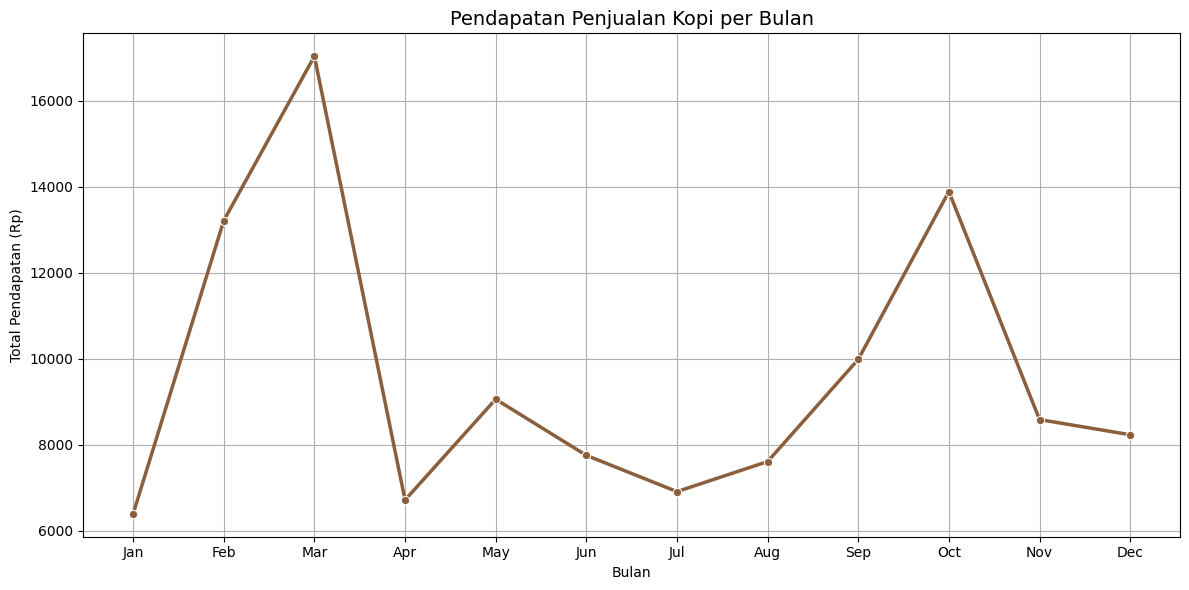

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month_name', y='money', data=df_bulan, marker='o', linewidth=2.5, color='#8B5E3C')  # kopi tone
plt.title('Pendapatan Penjualan Kopi per Bulan', fontsize=14)
plt.xlabel('Bulan')
plt.ylabel('Total Pendapatan (Rp)')
plt.grid(True)
plt.tight_layout()
plt.savefig("pendapatan_bulan.png", dpi=300)
plt.show()

In [ ]:
from google.colab import files
files.download("pendapatan_bulan.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
kopi_terpopuler = df['coffee_name'].value_counts().idxmax()

In [ ]:
metode_pembayaran = df['cash_type'].value_counts().idxmax()

In [ ]:
time_of_day_terbanyak = df['Time_of_Day'].value_counts().idxmax()

In [ ]:
bulan_terbaik = df.groupby('Month_name')['money'].sum().idxmax()

In [ ]:
hari_teramai = df['Weekday'].value_counts().idxmax()

In [ ]:
ringkasan_insight = pd.DataFrame({
    "Aspek": [
        "Kopi Paling Sering Dibeli",
        "Metode Pembayaran Terpopuler",
        "Waktu Transaksi Terbanyak (Time_of_Day)",
        "Bulan dengan Penjualan Tertinggi",
        "Hari Paling Ramai Transaksi"
    ],
    "Hasil": [
        kopi_terpopuler,
        metode_pembayaran,
        time_of_day_terbanyak,
        bulan_terbaik,
        hari_teramai
    ]
})

In [ ]:
ringkasan_insight

,Aspek,Hasil
0,Kopi Paling Sering Dibeli,Americano with Milk
1,Metode Pembayaran Terpopuler,card
2,Waktu Transaksi Terbanyak (Time_of_Day),Afternoon
3,Bulan dengan Penjualan Tertinggi,Mar
4,Hari Paling Ramai Transaksi,Tue


In [ ]:
top_sales = coffee_summary.loc[coffee_summary['sales_count'].idxmax()]
top_revenue = coffee_summary.loc[coffee_summary['total_revenue'].idxmax()]

print("Produk dengan penjualan terbanyak:", top_sales['coffee_name'])
print("Produk dengan pendapatan tertinggi:", top_revenue['coffee_name'])

Produk dengan penjualan terbanyak: Americano with Milk
Produk dengan pendapatan tertinggi: Latte


In [ ]:
least_sales = coffee_summary.loc[coffee_summary['sales_count'].idxmin()]
print("Produk dengan penjualan paling sedikit:", least_sales['coffee_name'])

Produk dengan penjualan paling sedikit: Espresso


In [ ]:
payment_by_coffee = df.groupby(['coffee_name', 'cash_type']).size().reset_index(name='count')
payment_by_coffee.sort_values(by='count', ascending=False)

,coffee_name,cash_type,count
2,Americano with Milk,card,809
14,Latte,card,757
0,Americano,card,564
4,Cappuccino,card,486
8,Cortado,card,287
12,Hot Chocolate,card,276
6,Cocoa,card,239
10,Espresso,card,129
15,Latte,cash,25
5,Cappuccino,cash,15


from matplotlib import pyplot as plt
_df_21['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_22.groupby('coffee_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_23.groupby('cash_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['cash_type'].value_counts()
    for x_label, grp in _df_25.groupby('coffee_name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('coffee_name')
_ = plt.ylabel('cash_type')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['coffee_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='count', y='coffee_name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['cash_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='count', y='cash_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
time_by_coffee = df.groupby(['coffee_name', 'Time_of_Day']).size().reset_index(name='count')
time_by_coffee.sort_values(by='count', ascending=False)

,coffee_name,Time_of_Day,count
4,Americano with Milk,Morning,336
23,Latte,Night,276
21,Latte,Afternoon,272
3,Americano with Milk,Afternoon,244
5,Americano with Milk,Night,244
0,Americano,Afternoon,239
22,Latte,Morning,234
1,Americano,Morning,225
8,Cappuccino,Night,206
6,Cappuccino,Afternoon,169


In [ ]:
top_by_time = df.groupby(['Time_of_Day', 'coffee_name']).size().reset_index(name='count')
top_by_time = top_by_time.sort_values(['Time_of_Day', 'count'], ascending=[True, False])
top_by_time

,Time_of_Day,coffee_name,count
7,Afternoon,Latte,272
1,Afternoon,Americano with Milk,244
0,Afternoon,Americano,239
2,Afternoon,Cappuccino,169
4,Afternoon,Cortado,91
6,Afternoon,Hot Chocolate,82
3,Afternoon,Cocoa,76
5,Afternoon,Espresso,58
9,Morning,Americano with Milk,336
15,Morning,Latte,234


In [ ]:
coffee_summary = df.groupby("coffee_name")["money"].sum().sort_values(ascending=False)
summary_text = "\n".join([f"{coffee}: ${money:,.2f}" for coffee, money in coffee_summary.items()])

In [ ]:
f"""
Berikut adalah data penjualan beberapa jenis kopi, termasuk jumlah unit terjual dan total pendapatannya.

Gunakan data ini untuk memberikan:
1. Insight utama dari data penjualan kopi.
2. Rekomendasi strategi bisnis berdasarkan temuan tersebut.
3. Sampaikan secara ringkas, padat, dan mudah dipahami.

Tulis jawaban dalam bahasa Indonesia.
"""

'\nBerikut adalah data penjualan beberapa jenis kopi, termasuk jumlah unit terjual dan total pendapatannya.\n\nGunakan data ini untuk memberikan:\n1. Insight utama dari data penjualan kopi.\n2. Rekomendasi strategi bisnis berdasarkan temuan tersebut.\n3. Sampaikan secara ringkas, padat, dan mudah dipahami.\n\nTulis jawaban dalam bahasa Indonesia.\n'

In [ ]:
llm.invoke(prompt)
print(response)

Berdasarkan data pendapatan dari setiap jenis kopi, berikut beberapa insights dan rekomendasi bisnis yang dapat digunakan:

1. **Latte dan Cappuccino** menciptakan pendapatan yang paling tinggi. Ini menunjukkan bahwa kedua produk ini menjadi pilihan terpopuler untuk pelanggan. Strategi bisnis yang dapat dilakukan adalah memperkuat promosi dan pemasaran untuk kedua produk ini, serta mencari cara untuk meningkatkan kualitas dan pengalaman konsumen yang terkait dengan mereka.

2. **Americano dengan Susu** dan **Americano** juga menunjukkan pendapatan yang baik, yang sifatnya menunjukkan kebutuhan terhadap produk khas Americano dan versi milknya. Strategi bisnis yang dapat dilakukan adalah memastikan konsistensi kualitas dari kedua produk tersebut dan merekayakan berbagai pilihan opsi susu untuk Americano.

3. **Hot Chocolate** dan **Cocoa** menunjukkan pendapatan yang lebih kecil, tetapi masih berkontribusi. Hal ini sifatnya menunjukkan potensi untuk mengembangkan variasi lebih lanjut dar